<a href="https://colab.research.google.com/github/farhanwew/Digital-Image-processing/blob/main/hough%20circles%20and%20line%20transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Transformasi Hough untuk Deteksi Garis dan Lingkaran**

---

### 1. Konsep Transformasi Hough

Transformasi Hough adalah metode dalam pengolahan citra digital untuk mendeteksi bentuk geometris, seperti garis dan lingkaran, dalam citra biner. Teknik ini memetakan piksel pada citra ke dalam suatu ruang parameter dan mencari puncak akumulasi yang mengindikasikan keberadaan suatu bentuk.

- **Untuk garis**: Representasi parametrik garis menggunakan rumus:
  $$ \rho = x \cos \theta + y \sin \theta $$
  di mana $ \rho $ adalah jarak dari titik asal ke garis, dan $ \theta $ adalah sudut garis terhadap sumbu-x.

- **Untuk lingkaran**: Lingkaran memiliki tiga parameter (x, y, r) dan memerlukan lebih banyak perhitungan atau metode berbasis edge. Dengan persamaan: $$ (x - a)^2 + (y - b)^2 = r^2 $$
di mana $(a,b)$ adalah titik pusat lingkaran dan $r$ adalah panjang jari-jari lingkaran.

---

### 2. Deteksi Garis dengan Hough Transform

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra dan ubah ke grayscale
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi tepi
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Transform untuk garis
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Gambar garis pada citra
img_lines = img.copy()
if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_lines, (x1,y1), (x2,y2), (0,0,255), 2)

# Visualisasi
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(edges, cmap='gray'), plt.title('Tepi Citra')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)), plt.title('Deteksi Garis')
plt.show()
```

---

### 3. Deteksi Lingkaran dengan Hough Circle Transform

```python
# Menggunakan HoughCircles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=50, param2=30, minRadius=5, maxRadius=100)

img_circles = img.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for x, y, r in circles[0, :]:
        cv2.circle(img_circles, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_circles, (x, y), 2, (0, 0, 255), 3)

# Visualisasi
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Lingkaran')
plt.axis('off')
plt.show()
```

---

### 4. Parameterisasi dan Eksperimen

Cobalah mengubah parameter berikut:
- `param2`: ambang akumulasi minimum untuk mendeteksi lingkaran.
- `minDist`: jarak minimum antar pusat lingkaran.
- `minRadius`, `maxRadius`: batas ukuran lingkaran.
- Threshold pada HoughLines.

#### Contoh Eksperimen: Pengaruh Parameter Threshold dan Resolusi
```python
for threshold in [50, 100, 150]:
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    temp_img = img.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(temp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.figure()
    plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Threshold Hough = {threshold}')
    plt.axis('off')
    plt.show()
```

---

### 5. Integrasi dengan Penyambungan Tepi Berdasarkan Kriteria Gradient

Sebelum menerapkan transformasi Hough, hasil deteksi tepi dapat diperhalus menggunakan metode penyambungan tepi dengan kriteria gradient, seperti Non-Maximum Suppression (NMS).

```python
# Gunakan hasil NMS atau Canny sebagai input
edges_nms = cv2.Canny(gray, 100, 200)
lines = cv2.HoughLines(edges_nms, 1, np.pi / 180, 100)
```

### 6. Kesimpulan

Transformasi Hough memungkinkan deteksi bentuk-bentuk geometris sederhana (seperti garis dan lingkaran) dalam citra dengan efisien. Dengan memanfaatkan representasi parametrik dan akumulasi dalam ruang parameter, kita dapat mendeteksi garis dan lingkaran secara robust meskipun dengan noise. Eksperimen parameter seperti threshold, jarak minimum antar garis/l ingkaran, dan resolusi dapat sangat memengaruhi sensitivitas dan akurasi hasil deteksi sehingga penting untuk mendapatkan hasil optimal.Hasil deteksi dapat ditingkatkan dengan integrasi preprocessing seperti filter gradient dan penyambungan tepi berbasis arah.



In [2]:
! wget https://da4e1j5r7gw87.cloudfront.net/wp-content/uploads/sites/4848/2022/08/close-up-blue-eye-august-blog.jpg

--2025-05-05 07:16:07--  https://da4e1j5r7gw87.cloudfront.net/wp-content/uploads/sites/4848/2022/08/close-up-blue-eye-august-blog.jpg
Resolving da4e1j5r7gw87.cloudfront.net (da4e1j5r7gw87.cloudfront.net)... 3.167.151.57, 3.167.151.151, 3.167.151.153, ...
Connecting to da4e1j5r7gw87.cloudfront.net (da4e1j5r7gw87.cloudfront.net)|3.167.151.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70593 (69K) [image/jpeg]
Saving to: ‘close-up-blue-eye-august-blog.jpg.1’

close-up-blue-eye-a 100%[===================>]  68.94K  --.-KB/s    in 0.02s   

2025-05-05 07:16:07 (3.44 MB/s) - ‘close-up-blue-eye-august-blog.jpg.1’ saved [70593/70593]



In [3]:
image = '/content/close-up-blue-eye-august-blog.jpg'

#  Deteksi Garis dengan Hough Transform

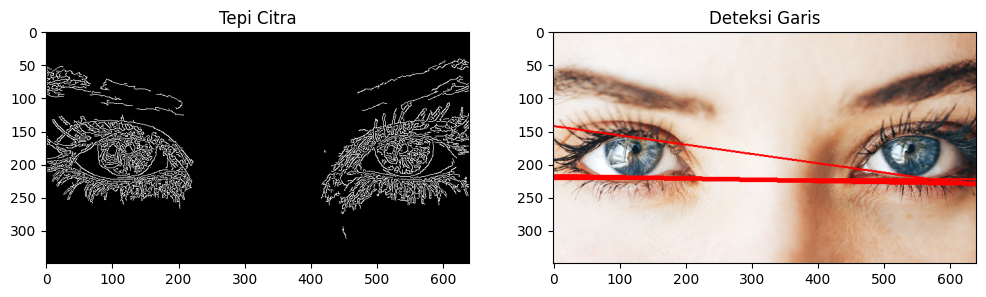

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca citra dan ubah ke grayscale
img = cv2.imread(image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Deteksi tepi
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Hough Transform untuk garis
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

# Gambar garis pada citra
img_lines = img.copy()
if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_lines, (x1,y1), (x2,y2), (0,0,255), 2)

# Visualisasi
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(edges, cmap='gray'), plt.title('Tepi Citra')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)), plt.title('Deteksi Garis')
plt.show()

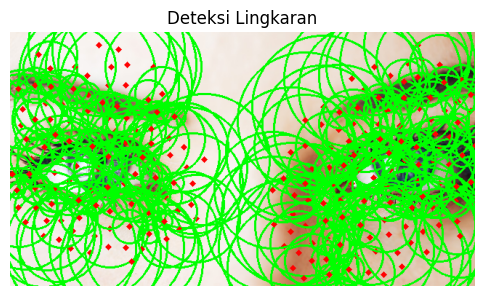

In [5]:
# Menggunakan HoughCircles
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                           param1=50, param2=30, minRadius=5, maxRadius=100)

img_circles = img.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for x, y, r in circles[0, :]:
        cv2.circle(img_circles, (x, y), r, (0, 255, 0), 2)
        cv2.circle(img_circles, (x, y), 2, (0, 0, 255), 3)

# Visualisasi
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
plt.title('Deteksi Lingkaran')
plt.axis('off')
plt.show()

# Eksperimen Hough line

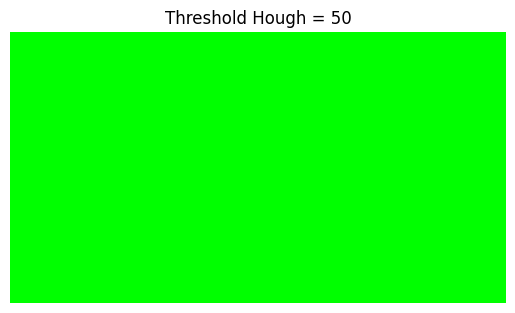

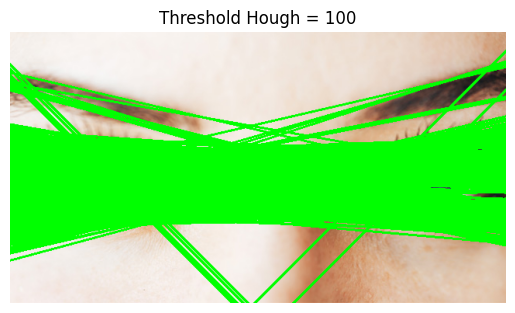

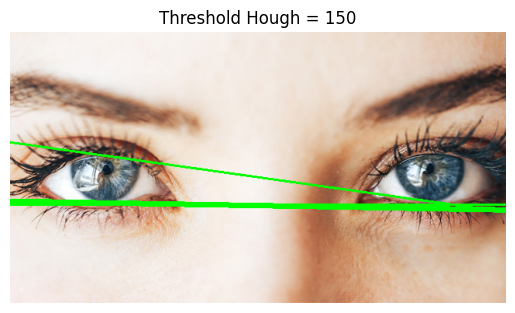

In [6]:
for threshold in [50, 100, 150]:
    lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold)
    temp_img = img.copy()
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(temp_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    plt.figure()
    plt.imshow(cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Threshold Hough = {threshold}')
    plt.axis('off')
    plt.show()

# Eksperimen Circle Hough

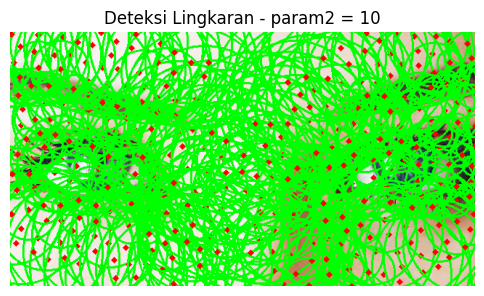

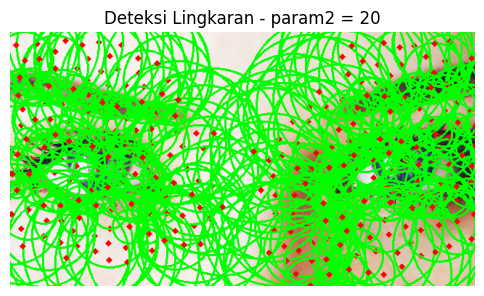

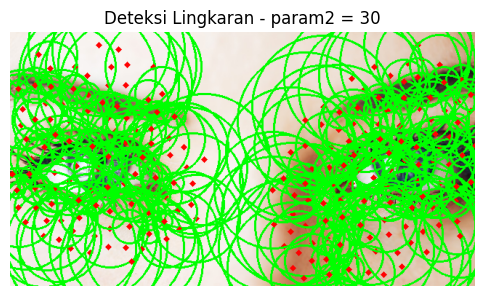

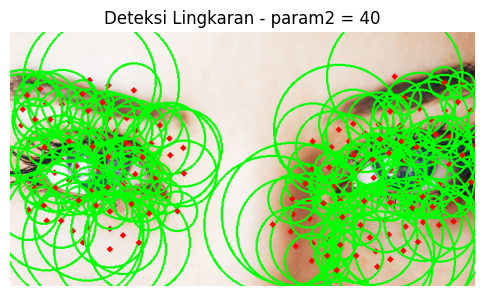

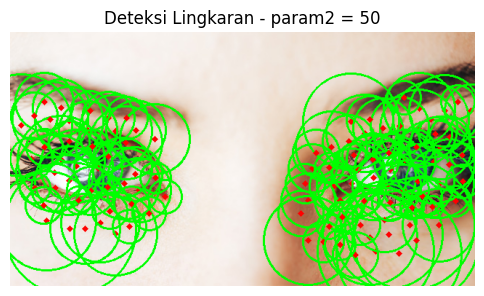

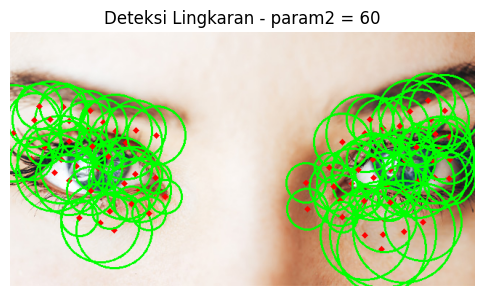

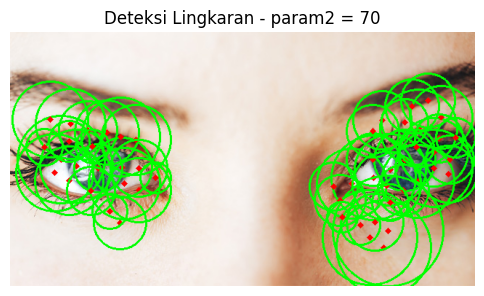

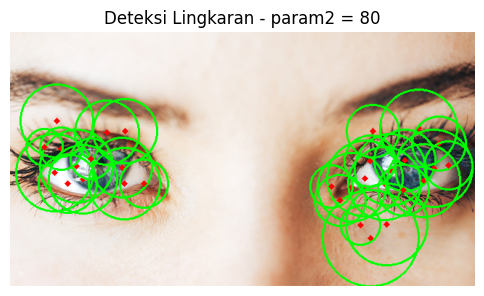

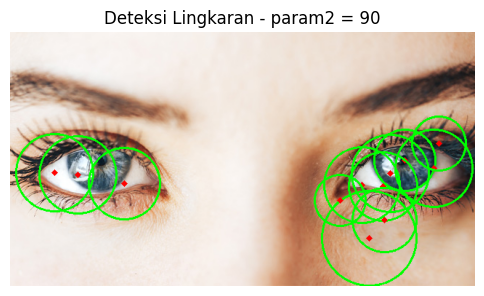

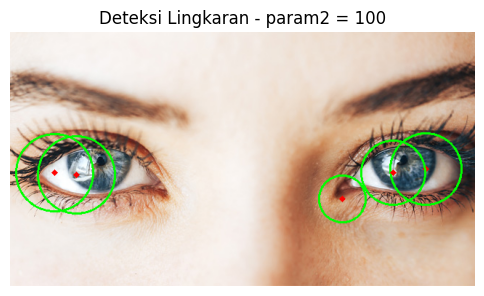

In [11]:


import matplotlib.pyplot as plt
import numpy as np
for param2 in range(10, 101, 10):
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20,
                               param1=50, param2=param2, minRadius=5, maxRadius=100)

    img_circles = img.copy()

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for x, y, r in circles[0, :]:
            cv2.circle(img_circles, (x, y), r, (0, 255, 0), 2)
            cv2.circle(img_circles, (x, y), 2, (0, 0, 255), 3)

    # Visualisasi
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img_circles, cv2.COLOR_BGR2RGB))
    plt.title(f'Deteksi Lingkaran - param2 = {param2}')
    plt.axis('off')
    plt.show()


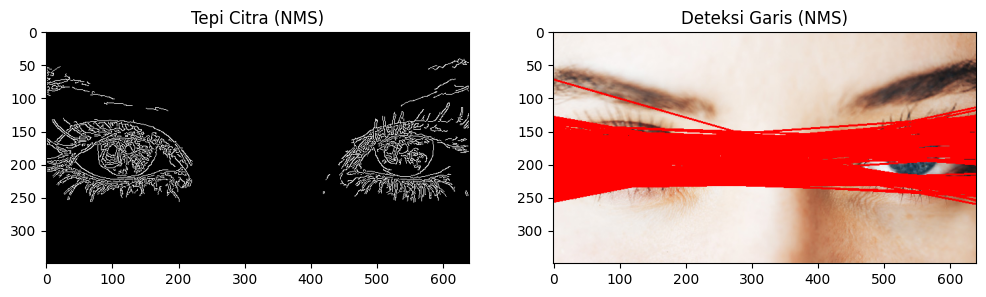

In [13]:


import matplotlib.pyplot as plt
import numpy as np
edges_nms = cv2.Canny(gray, 100, 200)
lines = cv2.HoughLines(edges_nms, 1, np.pi / 180, 100)

# Gambar garis pada citra
img_lines = img.copy()
if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(edges_nms, cmap='gray'), plt.title('Tepi Citra (NMS)')
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB)), plt.title('Deteksi Garis (NMS)')
plt.show()
